## Analyzing Covariance Matrices

In [2]:
import sys
import pickle as pkl
import pandas as pd
import numpy as np

In [3]:
import sacc
cluster_profiles = "/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-full-2026/cluster_profiles.pkl"
data = pkl.load(open(cluster_profiles, "rb"))

## Shear Covariance

tan_bootstrap covariance:


,0,1,2,3,4,5,6
0,2.058089e+24,1.436728e+24,1.082660e+24,6.527107e+23,3.944609e+23,3.199149e+23,2.673657e+23
1,1.436728e+24,1.545507e+24,1.290467e+24,8.173730e+23,5.125033e+23,4.356067e+23,3.060579e+23
2,1.082660e+24,1.290467e+24,1.484540e+24,1.018638e+24,6.200783e+23,5.067200e+23,4.285621e+23
3,6.527107e+23,8.173730e+23,1.018638e+24,1.056413e+24,6.912456e+23,4.828283e+23,4.920726e+23
4,3.944609e+23,5.125033e+23,6.200783e+23,6.912456e+23,8.894391e+23,6.426054e+23,3.832224e+23
5,3.199149e+23,4.356067e+23,5.067200e+23,4.828283e+23,6.426054e+23,8.344774e+23,4.722295e+23
6,2.673657e+23,3.060579e+23,4.285621e+23,4.920726e+23,3.832224e+23,4.722295e+23,7.860415e+23


cross_bootstrap covariance:


,0,1,2,3,4,5,6
0,3.925507e+22,9.502138e+21,1.817681e+20,-4.287777e+21,-2.606255e+21,-2.798450e+21,-1.295051e+21
1,9.502138e+21,2.010048e+22,3.803292e+21,2.138149e+21,1.950779e+21,2.002662e+21,-5.961459e+20
2,1.817681e+20,3.803292e+21,1.647280e+22,6.515404e+21,6.944856e+21,2.738866e+21,1.296003e+21
3,-4.287777e+21,2.138149e+21,6.515404e+21,1.954112e+22,1.031547e+22,7.809819e+21,3.217850e+21
4,-2.606255e+21,1.950779e+21,6.944856e+21,1.031547e+22,1.982912e+22,1.054617e+22,4.940135e+21
5,-2.798450e+21,2.002662e+21,2.738866e+21,7.809819e+21,1.054617e+22,1.671987e+22,7.928883e+21
6,-1.295051e+21,-5.961459e+20,1.296003e+21,3.217850e+21,4.940135e+21,7.928883e+21,8.763731e+21


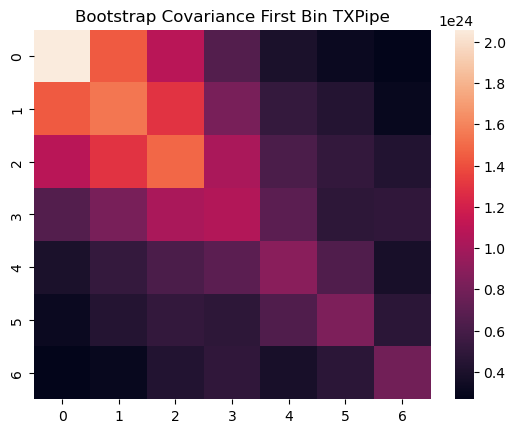

[np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30)]


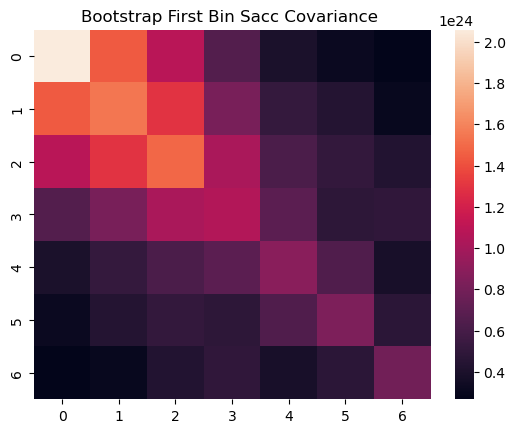

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import sacc
import pandas as pd
cov_data = data["bin_zbin_0_richbin_0"]["clmm_cluster_ensemble"].cov

tan_bs_df = pd.DataFrame(cov_data['tan_bs'])
cross_bs_df = pd.DataFrame(cov_data['cross_bs'])

print("tan_bootstrap covariance:")
display(tan_bs_df)  # Jupyter-friendly table

print("cross_bootstrap covariance:")
display(cross_bs_df)

sns.heatmap(cov_data['tan_bs'], annot=False, fmt=".2e")
plt.title("Bootstrap Covariance First Bin TXPipe")
plt.show()


t = sacc.Sacc.load_fits("/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-full-2026/cluster_sacc_catalog.sacc")
idx_cov_ds_00 = []
for i in range(0,7):
    trac = ('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_0', f'radius_{i}')
    idx_cov_ds_00.append(t.indices(tracers=trac, data_type=sacc.data_types.standard_types.cluster_delta_sigma)[0])
print(idx_cov_ds_00)
cov_ds = t.covariance.get_block(indices=idx_cov_ds_00)
sns.heatmap(cov_ds, annot=False, fmt=".2e")
plt.title("Bootstrap First Bin Sacc Covariance ")
plt.show()

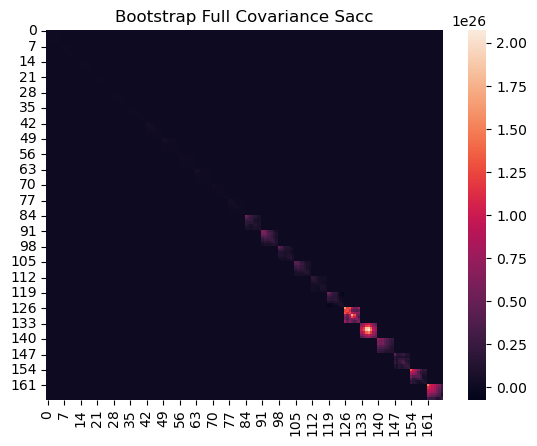

In [26]:
idx_cov_ds = t.indices(data_type=sacc.data_types.standard_types.cluster_delta_sigma)
cov_ds = t.covariance.get_block(indices=idx_cov_ds)
sns.heatmap(cov_ds, annot=False, fmt=".2e")
plt.title("Bootstrap Full Covariance Sacc")
plt.show()


## Cluster Counts Covariance

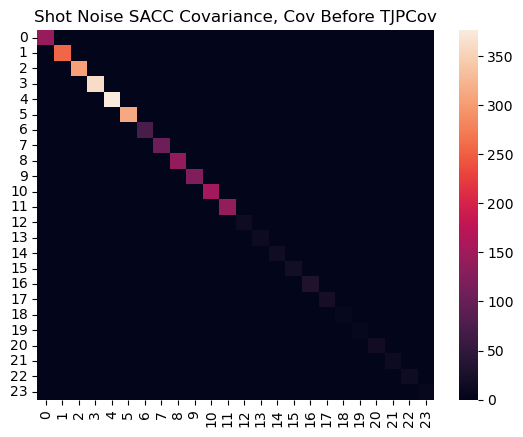

Text(0.5, 1.0, 'SCC SACC Covariance')

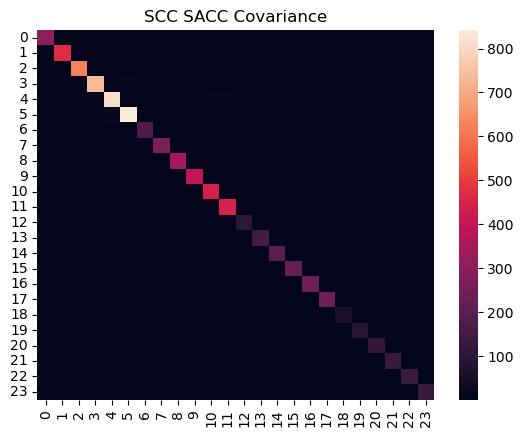

In [31]:
t = sacc.Sacc.load_fits("/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-full-2026/cluster_sacc_catalog.sacc")
tracer_comb = (("cosmodc2_redmapper","bin_z_1", "bin_rich_0"))
data_type = sacc.standard_types.cluster_counts
idx = t.indices(data_type=data_type)
cov_counts = t.covariance.get_block(idx)
sns.heatmap(cov_counts, annot=False, fmt=".2e", label="Shot Noise")
plt.title("Shot Noise SACC Covariance, Cov Before TJPCov")
plt.show()
t2 = sacc.Sacc.load_fits("/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_lensing/outputs_mor/clusters_sacc_file_cov.sacc")
tracer_comb2 = (("cosmodc2_redmapper","bin_z_1", "bin_rich_0"))
data_type = sacc.standard_types.cluster_counts
idx = t2.indices(data_type=data_type)
cov_counts2 = t2.covariance.get_block(idx)
sns.heatmap(cov_counts2, annot=False, fmt=".2e", label="SCC")
plt.title("SCC SACC Covariance")
